# Data Preprocessing & Feature Engineering

## Overview
In this notebook, we will **prepare the dataset** for model training by applying necessary preprocessing steps. Since credit card fraud detection involves **imbalanced data**, proper preprocessing is essential for building an effective model.

## Steps to Cover
1. **Feature Scaling** – Standardizing numerical features to improve model performance.  
2. **Handling Class Imbalance** – Applying **SMOTE (Synthetic Minority Over-sampling Technique)** to balance fraud and non-fraud cases.  
3. **Feature Selection** – Removing redundant or highly correlated features if necessary.  
4. **Final Dataset Check** – Ensuring data is properly preprocessed before moving to model training.

## Why is Preprocessing Important?
- **Fraudulent transactions are rare**, meaning an unbalanced dataset can lead to biased models.
- Some machine learning models (e.g., logistic regression, neural networks) **perform better with scaled features**.
- Oversampling techniques like **SMOTE** help models learn fraud patterns more effectively.

## Next Step: Feature Scaling
Before applying **SMOTE**, we will first scale our features to ensure they are in the same range.  

## Importing Required Libraries
Before we begin preprocessing, we need to import all necessary libraries.

In [16]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Train-Test Split
from sklearn.model_selection import train_test_split

# Model
import xgboost as xgb
from xgboost import plot_importance

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Display confirmation message
print("Libraries successfully imported!")

Libraries successfully imported!


## Loading the Dataset
We will now load the dataset and perform a quick check to ensure the data is properly structured before applying preprocessing steps.

In [3]:
# Load the dataset
df = pd.read_csv("../datasets/creditcard.csv")

# Quick check
print(f"Shape: {df.shape}")

# Display first few rows
df.head()

Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Feature Scaling

Feature scaling ensures that all numerical features are in the same range, preventing larger values from dominating smaller ones.  
Since we are using **XGBoost**, scaling is not strictly necessary, but it will improve performance for other models if tested later.  

### Scaling Method: Standardization (Z-Score)
- We will use **StandardScaler**, which transforms each feature to have:
  - **Mean = 0**
  - **Standard Deviation = 1**
- This method is **robust** and works well for most models.

In [5]:
# Define features (X) and target (y)
X = df.drop(columns=["Class"])
y = df["Class"]

# Initialize StandardScaler
scaler = StandardScaler()

# Scale features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Feature scaling completed!")
X_scaled.head()

Feature scaling completed!


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


## Saving Scaled Data

We will save the **scaled dataset before applying SMOTE**, so we can compare model performance:
- **`X_scaled.csv`** → Scaled features without SMOTE.
- **`y.csv`** → Target variable (unchanged).

In [6]:
# Save scaled features (without SMOTE)
X_scaled.to_csv("../datasets/X_scaled.csv", index=False)

# Save target variable
y.to_csv("../datasets/y.csv", index=False)

print("Scaled data saved successfully!")

Scaled data saved successfully!


## Handling Class Imbalance with SMOTE

Since fraud transactions are extremely rare (~0.17% of the dataset), training a model without balancing the classes may lead to **biased predictions**.  

To fix this, we will use **SMOTE (Synthetic Minority Over-sampling Technique)**:
- SMOTE **creates synthetic fraud samples** to balance the dataset.
- This prevents the model from being **biased toward non-fraud transactions**.
- We will save the **SMOTE-processed dataset separately** for model training.

In [7]:
# Load the previously saved scaled data
X_scaled = pd.read_csv("../datasets/X_scaled.csv")
y = pd.read_csv("../datasets/y.csv")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("SMOTE applied successfully!")
print(f"Original class distribution:\n{y.value_counts()}")
print(f"Resampled class distribution:\n{y_resampled.value_counts()}")

SMOTE applied successfully!
Original class distribution:
Class
0        284315
1           492
Name: count, dtype: int64
Resampled class distribution:
Class
0        284315
1        284315
Name: count, dtype: int64


## Visualizing Class Distribution Before & After SMOTE

To better understand the effect of SMOTE, we will **visualize class distribution before and after applying SMOTE**.

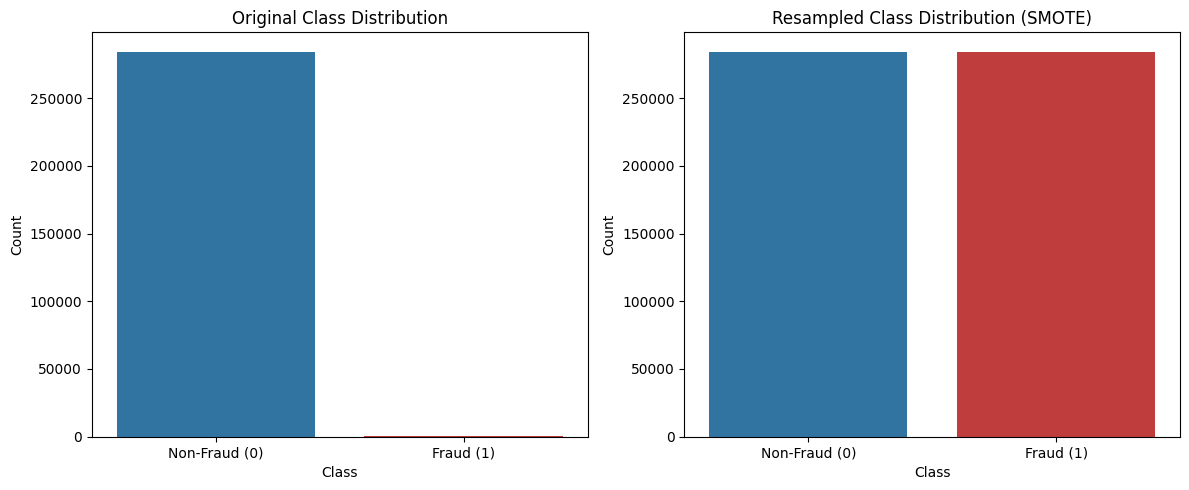

In [13]:
# Convert y_resampled to a DataFrame with column name "Class"
y_resampled = pd.DataFrame(y_resampled, columns=["Class"])

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Original class distribution
sns.countplot(x=y["Class"], palette=["#1f77b4", "#d62728"], ax=axes[0])
axes[0].set_title("Original Class Distribution")
axes[0].set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])
axes[0].set_ylabel("Count")

# Resampled class distribution after SMOTE
sns.countplot(x=y_resampled["Class"], palette=["#1f77b4", "#d62728"], ax=axes[1])
axes[1].set_title("Resampled Class Distribution (SMOTE)")
axes[1].set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])
axes[1].set_ylabel("Count")

plt.tight_layout()

# Save the plot
plt.savefig("../images/smote_class_distribution.png")

# Show the plot
plt.show()

## Save SMOTE-Processed Data

Since we applied SMOTE to balance the dataset, we will save:
- **`X_smote.csv`** → Features after SMOTE.
- **`y_smote.csv`** → Target variable after SMOTE.

This allows us to easily load the data when training our model.

In [14]:
# Save SMOTE-processed features and target variable
X_resampled.to_csv("../datasets/X_smote.csv", index=False)
y_resampled.to_csv("../datasets/y_smote.csv", index=False)

print("SMOTE-processed dataset saved successfully!")

SMOTE-processed dataset saved successfully!


## Feature Selection

To improve model performance and reduce redundancy, we will:
1. **Remove Highly Correlated Features** → Avoid features that provide the same information.
2. **Use XGBoost Feature Importance** → Identify the most valuable features for fraud detection.

This ensures we keep only the most **relevant** features before model training.

In [15]:
# Compute correlation matrix
corr_matrix = X_scaled.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

print(f"Features to drop due to high correlation: {high_corr_features}")

# Drop correlated features
X_reduced = X_scaled.drop(columns=high_corr_features)

print(f"Correlated features removed. New shape: {X_reduced.shape}")

Features to drop due to high correlation: []
Correlated features removed. New shape: (284807, 30)


<Figure size 1000x600 with 0 Axes>

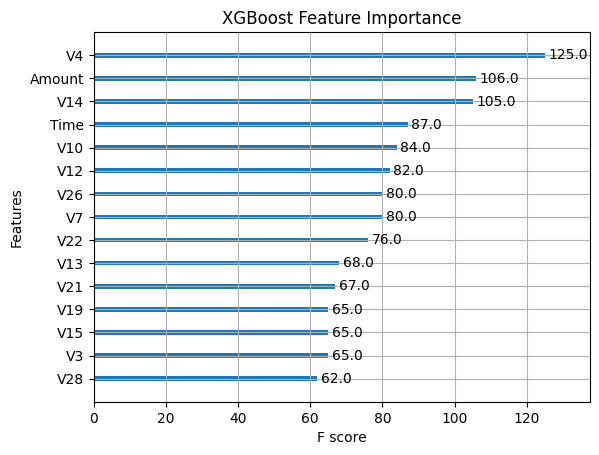

In [19]:
# Train a simple XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_reduced, y)

# Plot feature importance
plt.figure(figsize=(10,6))
plot_importance(xgb_model, max_num_features=15)  # Show top 15 features
plt.title("XGBoost Feature Importance")

# Save the plot
plt.savefig("../images/XGBoost_feature_importance.png")

# Show the plot
plt.show();

## Feature Selection Summary

After analyzing feature redundancy and importance, we found that:  
- **No features were highly correlated** (correlation > 0.9), so **nothing was removed**.  
- **XGBoost Feature Importance** showed that some features contribute more than others, but all features may still hold valuable information.  
- **Final Decision:** We will **keep all features** and move to model training without dropping any.

## Final Dataset Check

Before moving to model training, we will:
- **Verify dataset shape** → Ensure feature dimensions match expectations.
- **Check for missing values** → Confirm no data is lost during preprocessing.
- **Confirm class distribution** → Ensure SMOTE balanced the dataset correctly.

This will ensure our dataset is fully prepared for training!

In [21]:
# Reload datasets (scaled & SMOTE versions)
X_scaled = pd.read_csv("../datasets/X_scaled.csv")
y = pd.read_csv("../datasets/y.csv")

X_smote = pd.read_csv("../datasets/X_smote.csv")
y_smote = pd.read_csv("../datasets/y_smote.csv")

# Check dataset shapes
print(f"Original Scaled Data Shape: {X_scaled.shape}")
print(f"Original Target Shape: {y.shape}")
print(f"SMOTE Resampled Data Shape: {X_smote.shape}")
print(f"SMOTE Target Shape: {y_smote.shape}")

# Check for missing values
print("\n\nChecking for missing values:")
print(f"Original Data: {X_scaled.isnull().sum().sum()} missing values")
print(f"SMOTE Data: {X_smote.isnull().sum().sum()} missing values")

# Confirm class distribution
print("\n\nClass distribution:")
print(f"Original Target:\n{y.value_counts(normalize=True)}")
print(f"SMOTE Target:\n{y_smote.value_counts(normalize=True)}")

print("\nFinal dataset check complete. Ready for model training!")

Original Scaled Data Shape: (284807, 30)
Original Target Shape: (284807, 1)
SMOTE Resampled Data Shape: (568630, 30)
SMOTE Target Shape: (568630, 1)


Checking for missing values:
Original Data: 0 missing values
SMOTE Data: 0 missing values


Class distribution:
Original Target:
Class
0        0.998273
1        0.001727
Name: proportion, dtype: float64
SMOTE Target:
Class
0        0.5
1        0.5
Name: proportion, dtype: float64

Final dataset check complete. Ready for model training!


## Preprocessing Complete

We have now **fully preprocessed our dataset** and confirmed that everything is correctly prepared for model training.  
Key steps covered:
1. **Feature Scaling** → Standardized all numerical features.  
2. **Handling Class Imbalance** → Applied **SMOTE** to balance fraud & non-fraud cases.  
3. **Feature Selection** → Verified that all features are useful (none were removed).  
4. **Final Dataset Check** → Confirmed dataset shape, missing values, and class distribution.

Now, we are **ready to train our first model!**